In [1]:
%matplotlib inline

# Classification of Handwritten Digits

## Data Mining Team Names:
David Samuel,
James Hancock,
Alexandra Fisher, 
and Remy Lagrois

This notebook will explore a number of different models to classify the MNIST Handwritten Dataset.  You can get started with the dataset and benchmarks at https://www.kaggle.com/c/digit-recognizer.  

We will use the CRISP-DM framework seen below to iterate the data processing and modeling.  You can get a breif overview here: https://en.wikipedia.org/wiki/Cross_Industry_Standard_Process_for_Data_Mining

<a title="By Kenneth Jensen (Own work) [CC BY-SA 3.0 (http://creativecommons.org/licenses/by-sa/3.0)], via Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File%3ACRISP-DM_Process_Diagram.png"><img width="384" alt="CRISP-DM Process Diagram" src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/b9/CRISP-DM_Process_Diagram.png/512px-CRISP-DM_Process_Diagram.png"/></a>

<a id='table_of_contents'></a>
### Table of Contents
 [Business Understanding](#business_understanding)
 [Data Understanding](#data_understanding)
   - [Fig 1. Digit Frequency](#digit_frequency)  
 [Data Preparation](#data_preparation)          

[Logistic Regression](#logistic_regression)
  - [Cost Exploration](#cost_exploration)          
  - [Weights](#weights)    
  - [Pipeline](#pipeline) 

[Support Vector Machine](#support_vector_machine)                         
  - [Linear kernel](#linear_kernel)          
  - [Radial Basis Function (RBF) kernel](#rbf_kernel)    
  - [Third degree polynomial kernel](#polynomial_kernel)  
  - [Sigmoid kernel](#sigmoid_kernel)  

<a id='business_understanding'></a>
## Business Understanding 

This dataset was released and licensed for use in academia, and a purely knowledge based Kaggle competition which started in July, 2012, and will conclude at New Years Eve December, 2016.

The data was taken from the MNIST ("Modified National Institute of Standards and Technology").  This data has been extensively studied, which makes it an ideal candidate for learning machine learning techniques, repeatablility of testing, and new learning methodology.

The goal of the competition is to correctly classify the handwritten digits 0 through 9.  It is our job to process the image data, train a model using the training data, predict the labels of the test set, and report the accuracy.  We will iterate on this methodology through the use of various machine learning algorithms, and data transformations. 

<a id='data_understanding'></a>
## Data Understanding

This dataset is comprised of a training set of 42,000 labeled images, and 28,000 test images.  These images are each unique, and each contains 784 pixels, 0 through 255 representing a greyscale pixel.  The training set is labeled with the correct digit in the set of (0 through 9), while the testing set is unlabeled.  

In [2]:
# http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html#pandas.read_csv
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.html

import pandas as pd   # import pandas library as a variable, "pd"
import numpy as np    # import numpy library as "np"

print("Importing...")
# create data frame of training and testing sets

test = pd.read_csv("data/test.csv")              #  Sets testing object as a DataFrame
dataset = pd.read_csv("data/train.csv")             #  Set training object as a DataFrame
target = dataset[[0]].values.ravel()                #  Set target as the label values flattened to an ndarray(N-dimensional Array)                                            
train = dataset.iloc[:,1:].values                   #  Set train as the pixel values

print("Done!...")

Importing...
Done!...


## Here's a sample of the digits from Kaggle:
<img src="https://kaggle2.blob.core.windows.net/competitions/kaggle/3004/logos/front_page.png" alt="Drawing" style="width: 400px;"/>

<a id='digit_frequency'></a>
## Class Distribution 

The below graph shows the frequency of which each of the digits occured in the data set. This is important to help determine what numbers occurred the most often.

Size of the training dataset: 42000 Rows and 785 Columns
Size of the testing dataset: 28000 Rows and 784 Columns
Number of unique classes: 10
The Classes: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


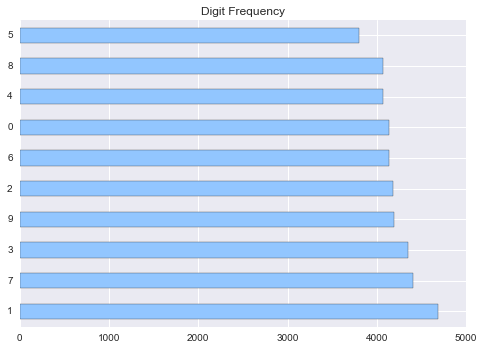

In [3]:
# http://seaborn.pydata.org/generated/seaborn.set.html?highlight=seaborn.set#seaborn.set

# seaborn.set(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=False, rc=None)
import matplotlib.pyplot as plt
import seaborn as sns       # import the seaborn library for a quick distribution plot
sns.set(color_codes=True)       # Reset color_codes to default

print 'Size of the training dataset:', dataset.shape[0], 'Rows and', dataset.shape[1], 'Columns'
print 'Size of the testing dataset:', test.shape[0], 'Rows and', test.shape[1], 'Columns'
print 'Number of unique classes:', len(dataset.label.unique())
print 'The Classes:', sorted(dataset.label.unique())
sns.set(style='darkgrid', palette='pastel')
c = pd.Series(target)
c = c.value_counts()
sns = c.plot(title="Digit Frequency", kind='barh')  # set seaborn object equal to pandas plot object and it will plot automatically
plt.show()



### The plot above shows the distribution of the labeled classes in the training Set. 
We can see from the graph above that the most common digit is 1 and occurs just under 5000 times. this will be taken into account in later sections.

<a id='data_preparation'></a>
## Data Preparation

### Split the data into training and testing and show the distribution of the split
Now the data set must be split in order to help determine how the distribution would correlate to the cross validation test. the grap below shows the output.

In [4]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(color_codes=True)
from sklearn.model_selection import train_test_split  # We will try the method train_test_split instead of ShuffleSplit

print("Importing...")
# create data frame of training and testing sets
trains = pd.read_csv("data/train.csv")
y = trains[[0]].values.ravel()
X = trains.iloc[:,1:].values

print("splitting...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)  # create x and y training set



Importing...
splitting...


C:\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


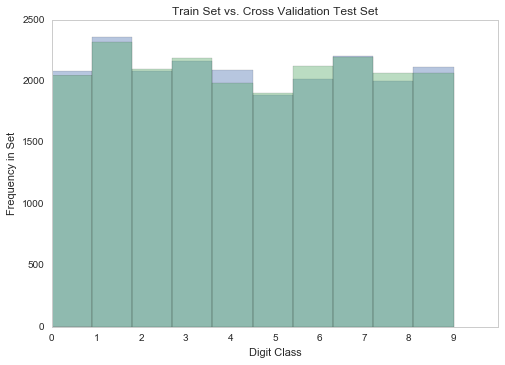

In [5]:
def splitter_display(train, test):
    sns.color_palette("Blues")
    sns.color_palette("husl", 8)
    sns.set_style("whitegrid", {'axes.grid' : False})
  
    ax = sns.distplot(train, bins=10, hist=True, kde=False)
    ax = sns.distplot(test, bins=10, hist=True, kde=False)
    ax.set(title="Train Set vs. Cross Validation Test Set", xlabel='Digit Class', ylabel='Frequency in Set', xticks=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
    ax.legend()
    plt.show() 

splitter_display(y_train, y_test)

## The Plot above shows differences in frequencies of the split in colored sections.  If the distribution appears normal, then it is ready for testing.

### The frequency of the split looks normal, ie. no noticable difference in color distribution above the bars.  

Note: This may not need to be run each time, as the train_test_split ensures a balanced class distribution

# Describe Final Dataset

In [5]:
# import pandas as pd   # import pandas library as a variable, "pd"
# import numpy as np    # import numpy library as "np"

# print("Importing...")
# # create data frame of training and testing sets

# test = pd.read_csv("data/test.csv")              #  Sets testing object as a DataFrame
# dataset = pd.read_csv("data/train.csv")             #  Set training object as a DataFrame
# target = dataset[[0]].values.ravel()                #  Set target as the label values flattened to an ndarray(N-dimensional Array)                                            
# train = dataset.iloc[:,1:].values                   #  Set train as the pixel values

# print("Done!...")


Importing...
Done!...


In [6]:
# # convert to array, specify data type, and reshape
# target = target.astype(np.uint8)
# train = np.array(train).reshape((-1, 1, 28, 28)).astype(np.uint8)
# test = np.array(testing).reshape((-1, 1, 28, 28)).astype(np.uint8)

# Below we plot the various number plots in order to show what the images actually look like. 
It is determined that a few of the variables may be hard to distinguish or not compeltely obvious when given the picture alone.

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


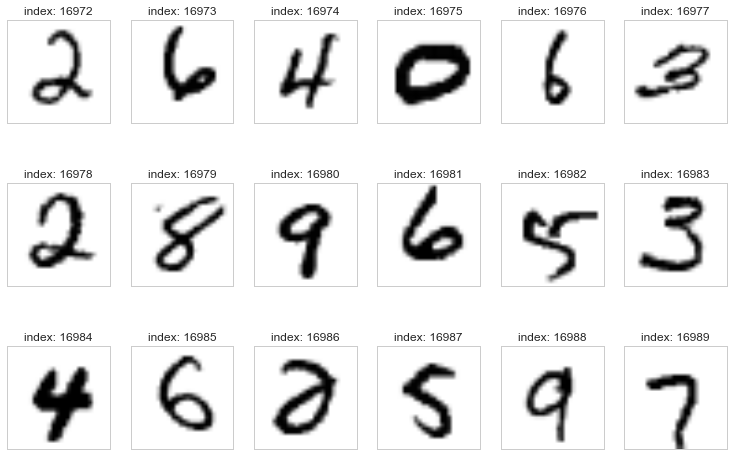

In [6]:
# The function below plots the images with their labels above
# Code sampled from ../03.%20Dimension%20Reduction.ipynb
%pylab inline
import pylab as pl

# Set X and y to plot
X = train
y = target
names = np.sort(dataset.label.unique())     # Created sorted labels array to match titles with images

#  Create function to plot single digit of interest
def plot_now(images, titles, h=28, w=28, cmap=pl.cm.binary, r=0):    # Set a 
    pl.imshow(images.reshape((h, w)), cmap=cmap)
    pl.title(titles, size=16)
    pl.xticks(())
    pl.yticks(())

#  Create function to plot a gallery of interest
def plot_gallery(images, titles,  h=28, w=28, n_row=3, n_col=6, cmap=pl.cm.binary, random=True, index=False, r=0):
    if random:r=(np.random.randint(len(images)-(n_row*n_col)-1))
    pl.figure(figsize=(1.7 * n_col, 2.3 * n_row))
    pl.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        pl.subplot(n_row, n_col, i + 1)
        pl.imshow(images[i+r].reshape((h, w)), cmap=cmap)
        if index==True:pl.title('index: '+str(i+r), size=12)
        else:pl.title(titles[i+r], size=16)
        pl.xticks(())
        pl.yticks(())

plot_gallery(X, names[y], index=True)

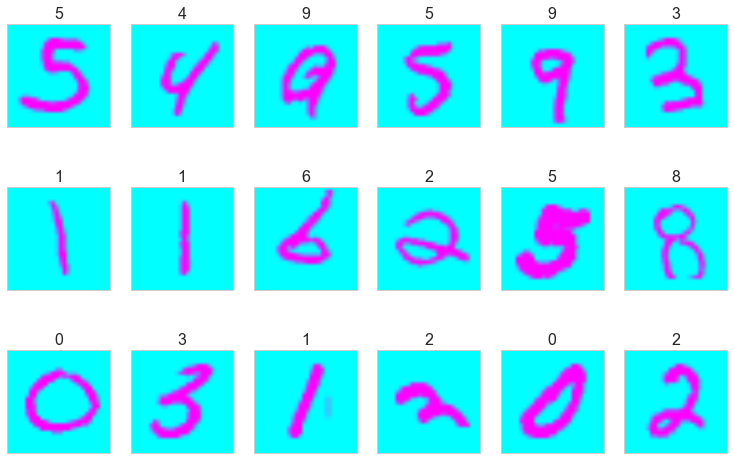

In [7]:
plot_gallery(X, names[y], 28, 28, index=False, random=False, r=21400, cmap=pl.cm.cool)

### Using the plot_now function we can now plot a random gallery, or an individual image or array of images plot_now() function will plot a single digit.

Now that the pictures are more obvious with a more distinguishable color scale it can be dertemined that the centers and edges are more well defined

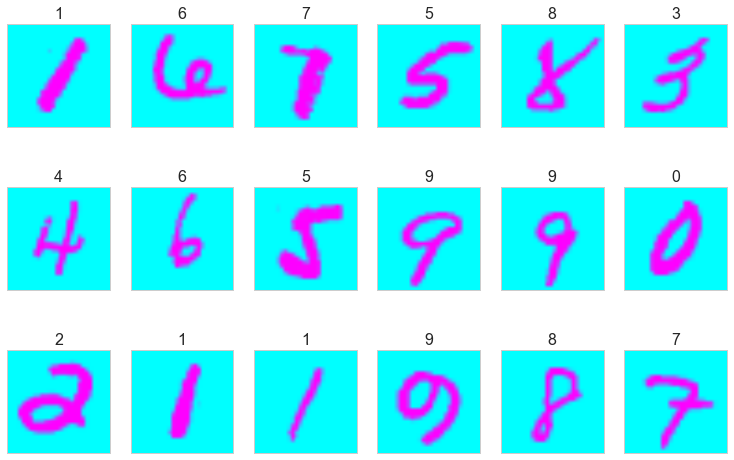

In [8]:
plot_gallery(X, names[y], 28, 28, cmap=pl.cm.cool)

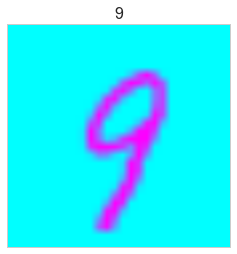

In [9]:
N=2306
plot_now(X[N], names[y][N], cmap=pl.cm.cool)

# Modeling and Evaluation
The next necessary function for this data set is to determine which of the components are most important. To do this a PCA is performed. From the below output we  can see that the variance is explained by the top 50 principal components, which is a fairly large percentage.

In [10]:
# Let's try reducing dimensionality with PCA to 50 components 
# as we have seen from the eigenvectors from lab 1, 50 should be sufficient

# http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA.fit_transform

# sklearn.decomposition.PCA(n_components=None, copy=True, whiten=False, 
# svd_solver='auto', tol=0.0, iterated_power='auto', random_state=None)

from scipy import stats, integrate
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
from sklearn.decomposition import PCA

print("Fitting PCA...")
n_comp = 50

# whitening was recommended, as well as arpack solver

pca = PCA(n_components=n_comp, whiten=True, svd_solver='auto')

# Set fitted PCA object
trainer = pca.fit_transform(X_train)
tester = pca.fit_transform(X_test)

evr = pca.explained_variance_ratio_
print sum(evr), "Percent Variance Explained by", n_comp, 'PCs'

# Create cumulative series to plot
cum = 0
d = []
evr = pca.explained_variance_ratio_

for i in range(50):  
    cum += evr[i]
    d.append(cum)

print("Done!")

Fitting PCA...
0.825640979513 Percent Variance Explained by 50 PCs
Done!


## Plotting the variance
We can see from the distibution chart below that neearly 80% of the variance is explaied by the top 40 and 65% of the variables are explained by the top 20 components

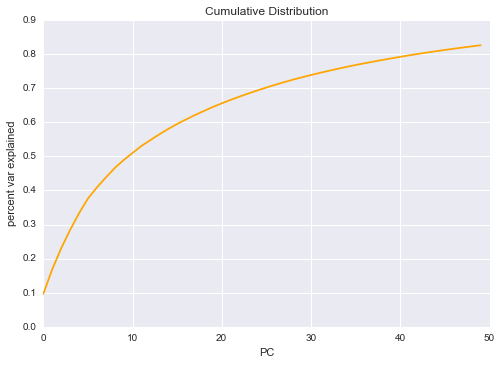

In [11]:
plt.plot(d, color='orange', label=True)
plt.title('Cumulative Distribution')
plt.xlabel('PC')
plt.ylabel('percent var explained')
plt.show()

In [12]:
# from the tutorial: http://www.kaggle.com/c/datasciencebowl/details/tutorial 
def multiclass_log_loss(y_true, y_pred, eps=1e-15):
    """Multi class version of Logarithmic Loss metric.
    https://www.kaggle.com/wiki/MultiClassLogLoss

    Parameters
    ----------
    y_true : array, shape = [n_samples]
            true class, integers in [0, n_classes - 1)
    y_pred : array, shape = [n_samples, n_classes]

    Returns
    -------
    loss : float
    """
    predictions = np.clip(y_pred, eps, 1 - eps)

    # normalize row sums to 1
    predictions /= predictions.sum(axis=1)[:, np.newaxis]

    actual = np.zeros(y_pred.shape)
    n_samples = actual.shape[0]
    actual[np.arange(n_samples), y_true.astype(int)] = 1
    vectsum = np.sum(actual * np.log(predictions))
    loss = -1.0 / n_samples * vectsum
    return loss
print("multiclass_log_loss() method loaded..")

multiclass_log_loss() method loaded..


From the below graph we can see that the accuracy of this PCA is around .83 which is respectable but not perfect. We can also see that the log loss from this method is about 5.6 and fairly consistent between the 2 tests.

In [13]:
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics as mt

dt_clf = DecisionTreeClassifier()

print 'Training Once:'
# train the decision tree algorithm
dt_clf.fit(X_train,y_train)
yhat = dt_clf.predict(X_test)
class_probabilities = dt_clf.predict_proba(X_test)

print 'Accuracy:', mt.accuracy_score(y_test,yhat)
print 'Log Loss:', multiclass_log_loss(y_test, class_probabilities)

n_comp = 50
pca = PCA(n_components=n_comp, whiten=True, svd_solver='auto')

print 'Training Once:'
# transform the data using pca
pca.fit_transform(X_train)

# train the decision tree algorithm
dt_clf.fit(X_train,y_train)
yhat = dt_clf.predict(X_test)
class_probabilities = dt_clf.predict_proba(X_test)

print 'Accuracy:', mt.accuracy_score(y_test,yhat)
print 'Log Loss:', multiclass_log_loss(y_test, class_probabilities)

Training Once:
Accuracy: 0.835714285714
Log Loss: 5.67422755059
Training Once:
Accuracy: 0.836666666667
Log Loss: 5.64133347784


# For the next function it was deteremined that we would have better results without using the PCA reduction with the decision tree classfier.
From the graph below we do see a higher log loss and lower accuracy when performing this decision tree classifier but that is expected.

For the below it was determined that we should only use the Gini criterion, as entropy is too sensitive for this type of image classification

Training Once:
Accuracy: 0.806857142857
Log Loss: 6.67091795513


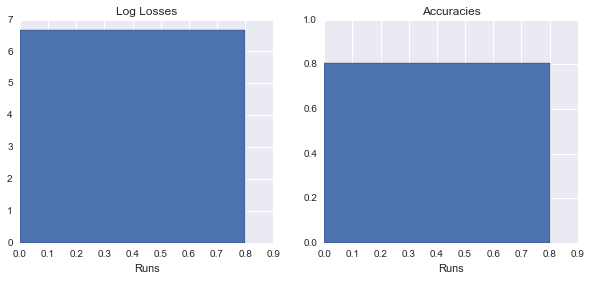

In [14]:
log_losses = []
accuracies = []
params = []

from matplotlib import pyplot as plt
%matplotlib inline

# how to make it generalize a bit better? 
# dt_clf = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2, 
#  min_samples_leaf=1, min_weight_fraction_leaf=0.0,
#  max_features=None, random_state=None, max_leaf_nodes=None, 
#  min_impurity_split=1e-07, class_weight=None, presort=False)
# defaults
dt_clf = DecisionTreeClassifier(criterion='gini', max_depth=None, 
                                min_samples_split=2, min_samples_leaf=1, 
                                max_features=None, max_leaf_nodes=None)

# # overwrite with prepruning methods
# dt_clf = DecisionTreeClassifier(criterion='entropy', max_depth=5, 
#                                 min_samples_split=1000, min_samples_leaf=1, 
#                                 max_leaf_nodes=None)


print 'Training Once:'

# transform the data using pca
pca.fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

# train the decision tree algorithm
dt_clf.fit(X_train,y_train)
yhat = dt_clf.predict(X_test)
class_probabilities = dt_clf.predict_proba(X_test)

# get accuracy and log loss of this training
acc = mt.accuracy_score(y_test,yhat)
ll = multiclass_log_loss(y_test, class_probabilities)
print 'Accuracy:', acc
print 'Log Loss:', ll

# save accuracy, log loss, and params of run
log_losses.append(ll)
accuracies.append(acc)
params.append(dt_clf.get_params())
    
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.bar(range(len(log_losses)),log_losses)
plt.title('Log Losses')
plt.xlabel('Runs')

plt.subplot(1,2,2)
plt.bar(range(len(accuracies)),accuracies)
plt.title('Accuracies')
plt.xlabel('Runs')
plt.ylim([0,1])

plt.show()

## We will now run PCA on Logistic Regression and SVM models, as we have learned from previous trials, reducing the dimensionality of the features will improve our model's predictive power.

In [15]:
# The function below plots a confusion matrix
#
from datetime import datetime as dt; start = dt.now()
print(__doc__)

import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
# # Create a DF from corr    
# conf = pd.DataFrame(conf)
# corr = conf.corr()

# # Generate a mask for the upper triangle
# mask = np.zeros_like(corr, dtype=np.bool)
# mask[np.triu_indices_from(mask)] = True

# # Set up the matplotlib figure
# f, ax = plt.subplots(figsize=(11, 9))

# # Generate a custom diverging colormap
# cmap = sns.diverging_palette(220, 10, as_cmap=True)

# # Draw the heatmap with the mask and correct aspect ratio
# # heatmap(data, vmin=None, vmax=None, cmap=None, center=None, robust=False, annot=None, fmt='.2g', annot_kws=None, linewidths=0, 
# #         linecolor='white', 
# #         cbar=True, cbar_kws=None, cbar_ax=None, square=False, ax=None, xticklabels=True, yticklabels=True, mask=None, **kwargs)

# ax = sns.heatmap(corr)

Automatically created module for IPython interactive environment


Sag Solver...
Fitting Logit...


C:\Anaconda2\lib\site-packages\sklearn\linear_model\sag.py:286: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


predicting...
Accuracy is 73.3142857143 %
8 CPUs Ran in 0:00:48.888000 minutes
Confusion matrix, without normalization
[[1543    0   29    7    3  329   64   18   49    7]
 [   0 2135   82   34    4    8    7   20   32    0]
 [  43   20 1637   46   44   11   66   34  149   47]
 [  22   10   67 1702   24   99   37   42  140   47]
 [   7   15   47   28 1318    7   24  159   36  342]
 [ 140   41   27  157   60  832  135  188  297   27]
 [  32    0  172    2   63   48 1742   24   20   18]
 [   9   35   70   65   95   25    0 1777   28   95]
 [  28   42   89  183   33  187   30   20 1375   77]
 [  18   18   63   47  273   29    4  162  122 1335]]
Probabilities [[  3.13489347e-09   1.37051660e-11   1.17390717e-06 ...,   1.73590950e-06
    6.32534158e-05   2.07240669e-03]
 [  1.79686462e-07   1.34852143e-06   2.35527090e-03 ...,   4.99647304e-10
    5.32150218e-04   6.00624250e-06]
 [  9.21665496e-01   2.08060985e-08   4.83318036e-03 ...,   5.71688815e-02
    7.16415665e-05   9.18145108e-04]


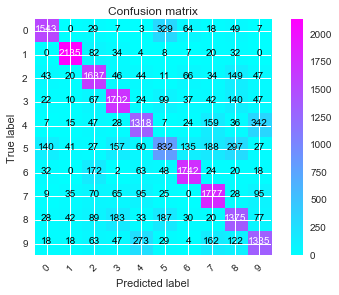

In [16]:
from datetime import datetime as dt
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics as mt
import multiprocessing
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

# http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression

# sklearn.linear_model.LogisticRegressionCV(Cs=10, fit_intercept=True, cv=None, dual=False, 
# penalty='l2', scoring=None, solver='lbfgs', tol=0.0001, max_iter=100, class_weight=None, 
# n_jobs=1, verbose=0, refit=True, intercept_scaling=1.0, multi_class='ovr', random_state=None)

start = dt.now()

skf = StratifiedKFold(n_splits=3, shuffle=False, random_state=None)
# l2 regulariazation only works with 'multinomial' and solvers: ‘sag’, and ‘lbfgs’
# using 10 fold cross validation

c = LogisticRegressionCV(Cs=10, fit_intercept=True, cv=skf, n_jobs=-1, penalty='l2', 
                              solver='sag', tol=0.00001, class_weight=None, 
                              verbose=0, refit=True, intercept_scaling=1.0, multi_class='multinomial')

# print 'maximum probability', [x for max(x) in prob]
print("Sag Solver...")
print("Fitting Logit...")
c.fit(trainer, y_train)

print("predicting...")
y_hat = c.predict(tester)

print 'Accuracy is', mt.accuracy_score(y_test,y_hat)*100, '%'

print multiprocessing.cpu_count(), 'CPUs Ran in', dt.now() - start, 'minutes' 

conf = mt.confusion_matrix(y_test,y_hat)
plot_confusion_matrix(conf, [x for x in range(10)],
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.cool)

prob = c.predict_proba(tester)
print 'Probabilities', prob
print 'maximum probability', np.max(prob)


# The plot above shows high confusion with the 6's and 0's respecitively.  Also, 7 and 1 have been highly confused.  
The 7 and 1 might be results of serious over fitting. Therefore further analysis is required.

lbfgs Solver...
Fitting Logit...
predicting...
Accuracy 73.3904761905 %
CPU Time:  0:00:22.294000
Confusion matrix, without normalization
[[1545    0   28    6    3  331   65   18   46    7]
 [   0 2174   56   29    5    7    8   17   26    0]
 [  48   16 1633   48   45   11   66   34  155   41]
 [  21   12   69 1702   22   98   38   42  138   48]
 [   9   17   49   29 1304    5   29  167   33  341]
 [ 130   15   31  154   58  849  133  204  298   32]
 [  31    1  180    3   67   50 1730   21   22   16]
 [   8   23   70   68   93   27    0 1782   31   97]
 [  27   40   92  186   32  186   30   18 1376   77]
 [  17   21   63   48  270   33    4  180  118 1317]]
Probabilities [[  5.44993514e-10   9.92048562e-14   4.49245794e-07 ...,   8.27381868e-07
    2.86039763e-05   1.62215350e-03]
 [  2.02192440e-08   4.15233331e-08   1.08390139e-03 ...,   3.52862197e-11
    2.10008105e-04   1.16318224e-06]
 [  9.21257369e-01   1.58124310e-11   5.56485234e-03 ...,   5.68580984e-02
    7.15362820e-05

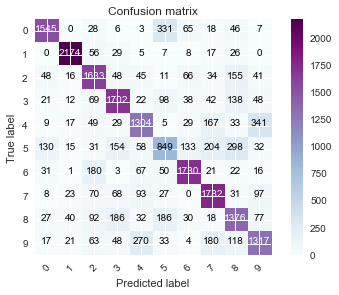

In [17]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
import numpy as np
from sklearn import metrics as mt

# Will try lbfgs
start = dt.now()

# http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression

c = LogisticRegressionCV(solver='lbfgs', cv=skf, penalty='l2', 
        multi_class='multinomial', tol=0.00001)


print("lbfgs Solver...")
print("Fitting Logit...")
c.fit(trainer, y_train)

print("predicting...")
y_hat = c.predict(tester)

print 'Accuracy', mt.accuracy_score(y_test,y_hat)*100, '%'

print 'CPU Time: ', dt.now() - start 

conf = mt.confusion_matrix(y_test,y_hat)
plot_confusion_matrix(conf, [x for x in range(10)],
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.BuPu)

prob = c.predict_proba(tester)
print 'Probabilities', prob
print 'maximum probability', np.max(prob)

## The 'sag' solver and multinomial class wins at < 50 seconds with 37.00% accuracy and 10 fold cross validation.  The confusion Matrices show 

When the tests above were being performed it was realized that the data was possibly consistent of too many variables, as it took quite some time to perform the log regrssion and other features. With that it was determined that a PCA for dimension reduction would be of great use of tools for this project.

The code below is pulled from a Kaggler, and provides functions for a PCA and logistic regression model that is over 90% accurate.

Now it is time to plot the weights to show where the numbers might lie in determination of which attributes are most important when predicting. As stated presviouly this data set is a little odd in determination of variable selection however we can see that the pixels in the middle of the data set, show to a much greater extent where the possible future values may lie.

Below a pipeline is used to help to a greater extent which values are the largest determinents. A pipline essentially applies a list of transforms along with a final estimator. The final estimator only needs to implement fit. From this we can determine which of the variables is most vital for model creation. As shown in the output the values toward the middle of the pixel scale appear to be the most likely determininents which is to be expected as most of the items would be drawn centered arond the middle of the box.

# Support Vector Machines¶
Scaled attributes from the training and testing data are now used for investigating associated weights and support vectors. This is done by using support vector machines (SVMs) on the data and adjusting the parameters.

In [18]:
import numpy as np
from sklearn.model_selection import train_test_split  # We will try the method train_test_split instead of ShuffleSplit

# set X and y, and testing data and normalize by 255.0 pixels

# try holding out the test set at 50/50
# random state can be changed, but will calibrate with 0
    
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)  # create x and y training set

print "Done Splitting."


Done Splitting.


In [19]:
from sklearn.decomposition import PCA
n_comp = 50

# whitening was recommended
pca = PCA(n_components=n_comp, whiten=True)

print("Fitting...")
# Set fitted PCA object
trainer = pca.fit_transform(X_train)
tester = pca.fit_transform(X_test)

print("done!")


Fitting...
done!


# Next a third degree polynomial.
To try to improve the accuracy a third degree polynomial will be used.

Training SVM... Predicting...
Accuracy 40.119047619 %
CPU Time:  0:07:33.042000
Probabilities [[  4.93460350e-08   3.74552484e-07   1.26082966e-03 ...,   1.77195520e-01
    1.70088571e-01   2.47801083e-01]
 [  1.20497742e-09   8.29560776e-05   8.51908484e-02 ...,   1.29625273e-08
    5.01381302e-05   7.58473504e-07]
 [  1.02178113e-07   3.67657078e-02   1.07972991e-03 ...,   1.72395358e-08
    2.06103685e-02   1.20420169e-06]
 ..., 
 [  2.77473577e-03   8.93993921e-07   2.07874449e-05 ...,   3.48691798e-06
    3.78686464e-01   9.01280543e-03]
 [  1.06150642e-03   6.12232440e-11   4.66349925e-03 ...,   9.35636274e-11
    8.24233188e-01   3.92050953e-05]
 [  2.03573139e-06   7.30882456e-03   1.19326229e-01 ...,   5.05090566e-06
    2.04363146e-02   2.54242109e-02]]
Confusion matrix, without normalization
[[1128    6   37   56   31  416   33  110   10  237]
 [   0 1048    0   17  295    2    2   20    9  962]
 [  14   29 1005   37  303   15   29  174  169  357]
 [   0    5   10  790  164 

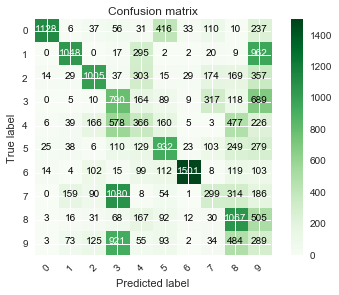

In [20]:
# Reuse X and y from PCA from above
from datetime import datetime as dt

from sklearn.svm import SVC
from sklearn import metrics as mt

# (C=1.0, kernel='rbf', degree=3, gamma='auto', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, 
# class_weight=None, verbose=False, max_iter=-1, decision_function_shape=None, random_state=None)

# adding max_iter or balancing slows things down and hurts accuracy, so leave it at defaults, and


start = dt.now()
s = SVC(C=0.5, kernel='poly', degree=3, probability=True, tol=0.00001)
print("Training SVM..."), 
s.fit(trainer, y_train) 

print("Predicting...") 
y_hat = s.predict(tester) 

print 'Accuracy', mt.accuracy_score(y_test,y_hat)*100, '%'
time = dt.now() - start
print 'CPU Time: ', time


 
conf = mt.confusion_matrix(y_test,y_hat)
prob = c.predict_proba(tester)
print 'Probabilities', prob   
# Compute confusion matrix
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
conf = mt.confusion_matrix(y_test,y_hat)
plot_confusion_matrix(conf, [x for x in range(10)],
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Greens)

# # Plot normalized confusion matrix
# plt.figure()
# plot_confusion_matrix(conf, classes=class_names, normalize=True,
#                       title='Normalized confusion matrix')

plt.show()


### The CM above shows confusion with 7--3, 3--9, 1--9 and particular trouble with 6;  it is possibly overfitting, C and tol could be turned down.  
Edge detection is possibly the best way to determine the best mix of parameters.

Training SVM... Predicting...
Accuracy 34.5095238095 %
CPU Time:  0:03:19.982000
Probabilities [[  4.93e-08   3.75e-07   1.26e-03 ...,   1.77e-01   1.70e-01   2.48e-01]
 [  1.20e-09   8.30e-05   8.52e-02 ...,   1.30e-08   5.01e-05   7.58e-07]
 [  1.02e-07   3.68e-02   1.08e-03 ...,   1.72e-08   2.06e-02   1.20e-06]
 ..., 
 [  2.77e-03   8.94e-07   2.08e-05 ...,   3.49e-06   3.79e-01   9.01e-03]
 [  1.06e-03   6.12e-11   4.66e-03 ...,   9.36e-11   8.24e-01   3.92e-05]
 [  2.04e-06   7.31e-03   1.19e-01 ...,   5.05e-06   2.04e-02   2.54e-02]]
Confusion matrix, without normalization
[[1657    0  122   52    5  137   16   50    4   21]
 [   0   86    8    9  514    2   10  729   24  973]
 [  81    5 1211   36  392   18  150  107   51   81]
 [  47    3   34  573  168   71   45  445  105  700]
 [  17  171  637  469  127  286   64    6  239   10]
 [ 132   11   23   99   61  850  127  150  280  161]
 [ 105    0  179    5  127   58 1582   12    6    3]
 [  17  400  313 1038   10  122    4  180 

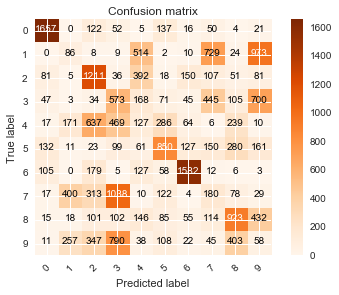

In [21]:
# Linear Kernel with tolerance upped by order of magnitude
from datetime import datetime as dt

from sklearn.svm import SVC
from sklearn import metrics as mt

start = dt.now()
weights1 = {0:.05,1:.15, 2:0.05, 3:0.125, 4:0.125, 5:0.1, 6:0.1, 7:0.15, 8:0.1, 9:0.05}
s = SVC(C=0.5, kernel='linear', probability=True, tol=0.00001)
print("Training SVM..."), 
s.fit(trainer, y_train) 

print("Predicting...") 
y_hat = s.predict(tester) 

print 'Accuracy', mt.accuracy_score(y_test,y_hat)*100, '%'

print 'CPU Time: ', dt.now() - start

conf = mt.confusion_matrix(y_test,y_hat)
prob = c.predict_proba(tester)
print 'Probabilities', prob 

conf = mt.confusion_matrix(y_test,y_hat)
plot_confusion_matrix(conf, [x for x in range(10)],
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges)


### With this new attempt there is possible a similar issue as above 7--3, 3--9, 9--1 are having trouble, but more sparse than polynomial. 
Less fitting might be the culprt where sensitivity as tol and C went down.  

In [51]:
# rbf kernel 
start = dt.now()

s = SVC(C=0.5, kernel='rbf', probability=True, tol=0.00001)
print("Training SVM..."), 
s.fit(train, y_train) 

print("Predicting...") 
y_hat = s.predict(test) 
print 'Accuracy', mt.accuracy_score(y_test,y_hat)*100, '%'

print 'CPU Time: ', dt.now() - start

conf = mt.confusion_matrix(y_test,y_hat)
prob = c.predict_proba(tester)
print 'Probabilities', prob 
conf = mt.confusion_matrix(y_test,y_hat)
plot_confusion_matrix(conf, [x for x in range(10)],
                      normalize=False,
                      title='Confusion matrix',
                      cmap=plt.cm.Reds)



Training SVM...

ValueError: Found input variables with inconsistent numbers of samples: [42000, 660]

 Training SVM... Predicting...
Accuracy 44.8095238095 %
CPU Time:  0:04:40.432000
Probabilities [[  4.93e-08   3.75e-07   1.26e-03 ...,   1.77e-01   1.70e-01   2.48e-01]
 [  1.20e-09   8.30e-05   8.52e-02 ...,   1.30e-08   5.01e-05   7.58e-07]
 [  1.02e-07   3.68e-02   1.08e-03 ...,   1.72e-08   2.06e-02   1.20e-06]
 ..., 
 [  2.77e-03   8.94e-07   2.08e-05 ...,   3.49e-06   3.79e-01   9.01e-03]
 [  1.06e-03   6.12e-11   4.66e-03 ...,   9.36e-11   8.24e-01   3.92e-05]
 [  2.04e-06   7.31e-03   1.19e-01 ...,   5.05e-06   2.04e-02   2.54e-02]]
Confusion matrix, without normalization
[[1618    0   66   42    9  261   22   13    7   26]
 [   0  932    3   34  456    3    8  296   12  611]
 [  27    3 1449   18  209   12  101   92  136   85]
 [  24    0   59  783  212  128   29  345  124  487]
 [   7   27  538  470  264  204   21    1  460   34]
 [  88    2   32  107   58 1073   67   75  288  104]
 [  43    0   98    6   33   81 1786   10   17    3]
 [  22  128  385 1184    8   43    0  188

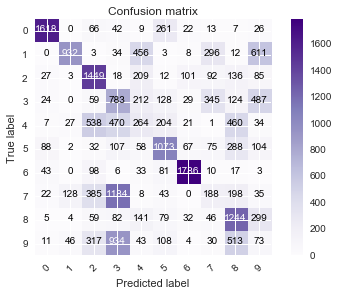

In [23]:
# rbf kernel 
start = dt.now()

s = SVC(C=0.5, kernel='rbf', probability=True, tol=0.00001)
print("Training SVM..."), 
s.fit(trainer, y_train) 

print("Predicting...") 
y_hat = s.predict(tester) 
print 'Accuracy', mt.accuracy_score(y_test,y_hat)*100, '%'

print 'CPU Time: ', dt.now() - start

conf = mt.confusion_matrix(y_test,y_hat)
prob = c.predict_proba(tester)
print 'Probabilities', prob 
conf = mt.confusion_matrix(y_test,y_hat)
plot_confusion_matrix(conf, [x for x in range(10)],
                      normalize=False,
                      title='Confusion matrix',
                      cmap=plt.cm.Purples)



# SVM with the 'rbf' solver outperforms the other solvers, and the logit in this arena due to multidimensional flexibility.


Training SVM... Predicting...
Accuracy 37.719047619 %
CPU Time:  0:03:44.054000
Probabilities [[  4.93e-08   3.75e-07   1.26e-03 ...,   1.77e-01   1.70e-01   2.48e-01]
 [  1.20e-09   8.30e-05   8.52e-02 ...,   1.30e-08   5.01e-05   7.58e-07]
 [  1.02e-07   3.68e-02   1.08e-03 ...,   1.72e-08   2.06e-02   1.20e-06]
 ..., 
 [  2.77e-03   8.94e-07   2.08e-05 ...,   3.49e-06   3.79e-01   9.01e-03]
 [  1.06e-03   6.12e-11   4.66e-03 ...,   9.36e-11   8.24e-01   3.92e-05]
 [  2.04e-06   7.31e-03   1.19e-01 ...,   5.05e-06   2.04e-02   2.54e-02]]
Confusion matrix, without normalization
[[1667    1   77   53    8  114   19   77    3   45]
 [   0  714   13    8  442    7   12  479    5  675]
 [  71   20 1075   31  341   18  238  146   50  142]
 [  32   26   46  552  239   63   61  503  110  559]
 [  28  199  569  385  187  312   69    5  252   20]
 [ 119   99   35   99   69  867  114  152  260   80]
 [  92    5  142    4   47   81 1671   18    2   15]
 [  47  338  409  936   10  102    0  179  

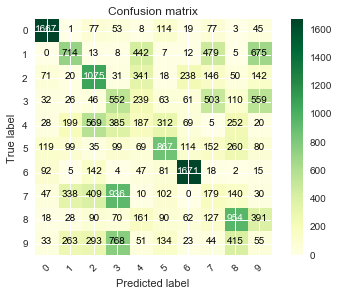

In [24]:
# sigmoid kernel 
start = dt.now()
s = SVC(C=0.5, kernel='sigmoid', probability=True, tol=0.00001)
print("Training SVM..."), 
s.fit(trainer, y_train) 

print("Predicting...") 
y_hat = s.predict(tester) 
print 'Accuracy', mt.accuracy_score(y_test,y_hat)*100, '%'

print 'CPU Time: ', dt.now() - start

conf = mt.confusion_matrix(y_test,y_hat)
prob = c.predict_proba(tester)
print 'Probabilities', prob 
conf = mt.confusion_matrix(y_test,y_hat)
plot_confusion_matrix(conf, [x for x in range(10)],
                      normalize=False,
                      title='Confusion matrix',
                      cmap=plt.cm.YlGn)

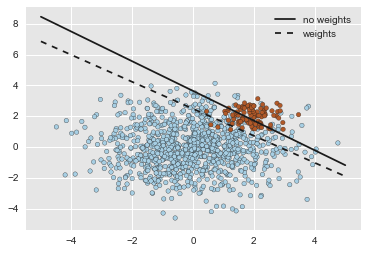

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.linear_model.stochastic_gradient import SGDClassifier
#from sklearn.linear_model import SGDClassifier

# we create 1000 separable points
rng = np.random.RandomState(0)
n_samples_1 = 1000
n_samples_2 = 100
X = np.r_[1.5 * rng.randn(n_samples_1, 2),
          0.5 * rng.randn(n_samples_2, 2) + [2, 2]]
y = [0] * (n_samples_1) + [1] * (n_samples_2)

# fit the model and get the separating hyperplane
clf = SGDClassifier(n_iter=100, alpha=0.01)
clf.fit(X, y)

w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-5, 5)
yy = a * xx - clf.intercept_[0] / w[1]


# get the separating hyperplane using weighted classes
wclf = svm.SVC(kernel='linear', class_weight={1: 10})
wclf.fit(X, y)

ww = wclf.coef_[0]
wa = -ww[0] / ww[1]
wyy = wa * xx - wclf.intercept_[0] / ww[1]

# plot separating hyperplanes and samples
h0 = plt.plot(xx, yy, 'k-', label='no weights')
h1 = plt.plot(xx, wyy, 'k--', label='weights')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.legend()

plt.axis('tight')
plt.show()


# RFB

In [ ]:
# Code adapted from https://www.kaggle.com/c/digit-recognizer/forums/t/2299/getting-started-python-sample-code-random-forest

# from sklearn.ensemble import RandomForestClassifier
# import numpy as np
# import pandas as pd

# # create the training & test sets, skipping the header row with [1:]
# dataset = pd.read_csv("data/train.csv")
# target = dataset[[0]].values.ravel()
# train = dataset.iloc[:,1:].values
# test = pd.read_csv("data/test.csv").values

# # create and train the random forest
# # multi-core CPUs can use: rf = RandomForestClassifier(n_estimators=100, n_jobs=2)
# rf = RandomForestClassifier(n_estimators=100, n_jobs=2)
# print("Fitting...")
# rf.fit(train, target)
# pred = rf.predict(test)

# np.savetxt('data/submission_rand_forest.csv', np.c_[range(1,len(test)+1),pred], 
#            delimiter=',', header = 'ImageId,Label', comments = '', fmt='%d')

# print 'CPU Time: ', dt.now() - start
# print("Benchmark Created!")

# use training subset set to train then cross validate on testing subset

In [26]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split
from sklearn import metrics as mt
from datetime import datetime as dt

print("splitting...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)  # create x and y training set

start=dt.now()
rf = RandomForestClassifier(n_estimators=100, n_jobs=2)
print("Fitting...")
%time rf.fit(X_train, y_train)

y_hat = rf.predict(X_test)
print 'Accuracy', mt.accuracy_score(y_test,y_hat)*100, '%'


splitting...
Fitting...
Wall time: 2.06 s
Accuracy 95.6818181818 %


In [30]:
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier
%matplotlib inline

dt_clf = DecisionTreeClassifier(criterion='gini', max_depth=None, 
                                min_samples_split=2, min_samples_leaf=1, 
                                max_features=None, max_leaf_nodes=None)

print 'Training Once:'

# transform the data using pca
pca.fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)


from sklearn import datasets, neighbors, linear_model



n_samples = len(X_train)

logistic = linear_model.LogisticRegression()
K = 5 
clf = KNeighborsClassifier(n_neighbors=K, weights='uniform', metric='euclidean')

print('KNN score: %f' % knn.fit(X_train, y_train).score(X_test, y_test))
print('LogisticRegression score: %f'
      % logistic.fit(X_train, y_train).score(X_test, y_test))

Training Once:


ValueError: n_components=50 must be between 0 and n_features=2L with svd_solver='full'

In [42]:
from sklearn.cross_validation import StratifiedShuffleSplit
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from IPython.html import widgets 

cv = StratifiedShuffleSplit(train_test_split, len(1), n_iter = 1, test_size = 0.5, train_size=0.5)

# fill in the training and testing data and save as separate variables
for train, test in cv:
    # note that these are sparse matrices

# fill in your code  here to train and test
# calculate the accuracy and print it for various values of K
    K = 5 
clf = KNeighborsClassifier(n_neighbors=K, weights='uniform', metric='euclidean')


acc = 0.2 # overwrite this with the actual accuracy

#=====================================

print('Accuracy of classifier with %d neighbors is: %.2f'%(K,acc))

TypeError: object of type 'int' has no len()

In [43]:
samples = [[0., 0., 0.], [0., .5, 0.], [1., 1., .5]]
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=1)
neigh.fit(samples) 
NearestNeighbors(algorithm='auto', leaf_size=30, ...)
print(neigh.kneighbors([[1., 1., 1.]])) 
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier
%matplotlib inline

dt_clf = DecisionTreeClassifier(criterion='gini', max_depth=None, 
                                min_samples_split=2, min_samples_leaf=1, 
                                max_features=None, max_leaf_nodes=None)

print 'Training Once:'

# transform the data using pca
pca.fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)


SyntaxError: invalid syntax (<ipython-input-43-3dae4febabca>, line 5)

In [47]:
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier
%matplotlib inline

dt_clf = DecisionTreeClassifier(criterion='gini', max_depth=None, 
                                min_samples_split=2, min_samples_leaf=1, 
                                max_features=None, max_leaf_nodes=None)

print 'Training Once:'

# transform the data using pca
pca.fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)


import numpy as np
samples = prob
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(radius=1.6)
neigh.fit(samples) 
NearestNeighbors(algorithm='auto', leaf_size=30)
rng = neigh.radius_neighbors([[1., 1., 1.]])
print(np.asarray(rng[0][0])) 
print(np.asarray(rng[1][0])) 


Training Once:


ValueError: n_components=50 must be between 0 and n_features=2L with svd_solver='full'

In [50]:
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier
%matplotlib inline
# transform the data using pca
pca.fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn import metrics as mt

neigh = KNeighborsClassifier(n_neighbors=3, algorithm='ball_tree')

neigh.fit(trainer, y_train)

y_hat = neigh.predict(tester)

print mt.accuracy_score(y_test,y_hat)

ValueError: n_components=50 must be between 0 and n_features=2L with svd_solver='full'